## Neural networks

Show the relationship between accuracy score and number of epochs.

In [4]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist

In [160]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

total_length = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], total_length) / 255.0
X_test = X_test.reshape(X_test.shape[0], total_length) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0888 - accuracy: 0.9779


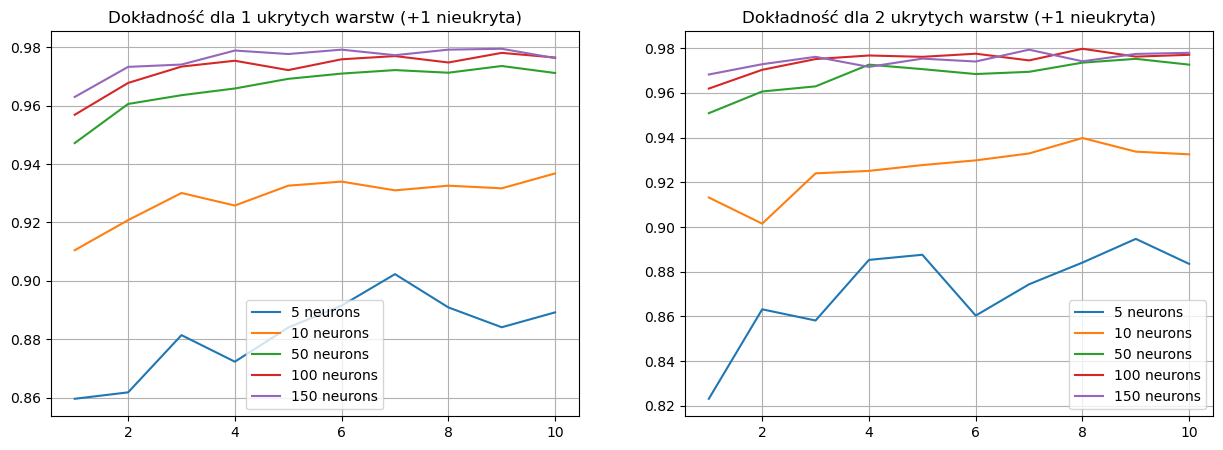

In [157]:
hidden_layers_numbers = [1, 2]
neurons_numbers = [5, 10, 50, 100, 150]
epochs_range = range(1, 11)

def get_accuracy_from_neural_network(epochs_number, neurons_number, hidden_layers_number):
    model = Sequential()
    
    model.add(Dense(units=neurons_number, activation='relu', input_shape=(784,)))
    # hidden layers:
    for i in range(hidden_layers_number-1):
        model.add(Dense(units=neurons_number, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs_number, verbose=0)
    return model.evaluate(X_test, y_test)[1]

def plot_accuracies_of_neural_networks():
    accuracies_per_hidden_layers_number = {
        hidden_layers_number: [
            [
                get_accuracy_from_neural_network(epochs_number, neurons_number, hidden_layers_number)
                for epochs_number in epochs_range
            ]
            for neurons_number in neurons_numbers
        ]
        for hidden_layers_number in hidden_layers_numbers
    }
    
    plt.figure(figsize = (15,5))
    
    i = 1
    for k,v in accuracies_per_hidden_layers_number.items():
        plt.subplot(1,2,i)
        for accuracies_per_neurons_number in v:
            plt.plot(epochs_range, accuracies_per_neurons_number, label = f'{neurons_numbers[v.index(accuracies_per_neurons_number)]} neurons')
        plt.title(f'Dokładność dla {k} ukrytych warstw (+1 nieukryta)')
        plt.legend()
        plt.grid()
        
        i+=1
    
    plt.show()
    return

plot_accuracies_of_neural_networks()